<a href="https://colab.research.google.com/github/ncgomez17/Deep_Learning/blob/master/Keras/Aprendiendo_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este sencillo programa vamos a entrenar una red neuronal para que puede detectar número del 0 al 9.
Para ello utilizaremos keras y cargaremos el conjunto de datos MNIST.
Este conjunto de datos se encuentra precargado en forma de cuatro arrays Numpy y se pueden obtener con el siguiente código.

In [1]:
import keras
print(keras.__version__)
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

2.4.3
11493376/11490434 [==============================] - 0s 0us/step


Vamos a comprobar los valores que hemos cargado, por ejemplo la imagen 8:

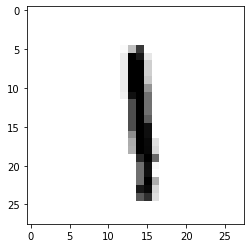

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

Miramos su correspondiente etiqueta:

In [3]:
print(y_train[9])

4


Como podemos observar Keras utiliza un arraymultidimensional de Numpy como estructura básica de datos, esta estructura se llama tensor.
Un tensor tiene tres atributos principales:
*   Numero de ejes(Rank): un tensor con un solo número será 0-dimensional, con un array 1-dimensional, conuna matriz 2-dimensional, y así sucensivamente.
*   Forma(shape):se trata de una tupla de enteros que describen cuantas dimensiones tiene el tensor en cada eje.
*   Tipo de datos(data type):este atributo indica el tipo de datos que tiene el tensor.

**Lo siguiente que haremos será obtener los atributos anteriores a partir del tensor de nuestro ejemplo**





In [4]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


Estas imágenes de 28x28 px representan números en el rango [0,255].Lo más habitual es escalar los valores de entrada de las redes neuronales a unos rangos determinados.En este caso comviene escalarlos a valores de tipo float32 dentro del intervalor [0,1].

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Para facilitar la entrada de datos a nuestra red neuronal(**En redes convolucionales no hace falta** ) debemos hacer una transformación del tensor(**imagen**) de 2 dimensiones a un vector de 1 dimensión.
Teniendo en cuenta esto la matriz 28x28 de cada imagen se puede representar con un vector de 784 números,que es lo que haremos a continuación.

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Las etiquetas para cada dato de entrada son números de 0 a 9 que índican el dígito que representa la imagen.En este ejemplo vamos representar esta etiqueta con un vector de 10 posiciones,donde la posición correspondiente al dígito que representa la imagen contiene un 1 y el resto de posiciones del vector tendrán valor 0.**Usaremos lo que se conoce como **[one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)
Para realizar esta transformación usaremos la función to_categorical de keras.utils

In [7]:
from keras.utils import to_categorical

Ahora mostraremos los valores antes de aplicarse la transformación

In [8]:
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)

7
5
(60000,)
(10000, 784)


In [9]:
## Aplicamos la transformación
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


Ahora ya tenemos los datos preparados para ser usados.Lo siguiente que haremos será crear con Keras la clase *Sequential*que permite la creación de una red neuronal básica.

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Como podemos observar, en el ejemplo hemos definido la red neuronal como una secuencia de dos capas que están densamente conectadas.

In [11]:
## Observamos la arquitectura de nuestro modelo

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Vamos explicar el resultado anterior obtenido.
La primera capa requiere 7850 parámetros(784x10) para almacenar los pesos de las 10 neuronas, además de los 10 parámetros adicionales para los sesgos.
En la segunda capa al ser una función *softmax* se requiere conectar todos sus nodos con los 10 nodos de la capa anterior, y por lo tanto se requieren 10x10 parametros además de los correspondientes 10 sesgos correspondientes a cada nodo.

El método *compile()* nos permitirá configurar como será nuestro modelo de aprendizaje.
Argumentos de la función como **loss** nos permitirá evaluar el grado de error entre las salidas calculadas y las salidas deseadas de los datos de entrenamiento.
Otro argumento es el **optimizador**, que es el que nos proporciona la manera de especificar el algoritmo de optimización, que permite a la red neuronal calcular los pesos de los parámetros a partir de los datos de entrada y de la función de loss definida.
Finalmente el último argumento es la **métrica** que utilizaremos para monitorizar el proceso de aprendizaje de nuestra red neuronal.En este ejemplo solo tendremos en cuenta accuracy(fracción de imágenes que son correctamente clasificadas)


In [16]:
## El optimizador usado es el stocastic gradient descent
model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics = ['accuracy'])
model.fit(x_train,y_train, batch_size=100,epochs=10,verbose=1)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 1.1690 - accuracy: 0.7163
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 1.0734 - accuracy: 0.7344
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.9936 - accuracy: 0.7501
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.9340 - accuracy: 0.7662
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.8809 - accuracy: 0.7729
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.8318 - accuracy: 0.7862
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.7992 - accuracy: 0.7913
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.7623 - accuracy: 0.8009
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.7327 - accuracy: 0.8080
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 0.7063 - accuracy: 0.8147

Ahora que ya hemos realizado en el entrenamiento evaluaremos como se comporta con datos nuevos de prueba

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accurancy',test_acc)

313/313 [==============================] - 0s 768us/step - loss: 0.6751 - accuracy: 0.8240
Test accurancy 0.8240000009536743


Esto nos indica que el modelo que hemos creado clasifica correctamente el 82.4% de los datos correctamente.
En el siguinete paso usaremos el modelo creado para realizar predicciones sobre que dígito representan nuevas imágenes, para esto eligiremos un elemento de x_test

6
1.0


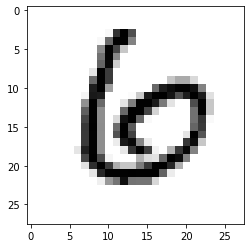

In [24]:
## Observamos el número del que se trata y hacemos la predicción
import numpy as np
(x_train2,y_train2),(x_test2,y_test2) = mnist.load_data()
plt.imshow(x_test2[11], cmap=plt.cm.binary)
predictions = model.predict(x_test)
print(np.argmax(predictions[11]))
print(np.sum(predictions[11]))

Lo siguiente que haremos será mostrar la matriz de confusión, el código se ha sacado de la web de SKLEARN.

In [25]:

# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

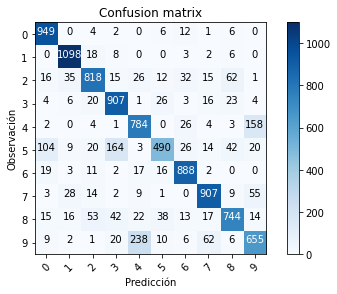

In [26]:

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))